## Linearna regresija

In [7]:
def plot_coefficients(coef):
    coef=coef.ravel()
    D = len(coef)
    plt.title("Parametri modela")
    plt.bar(np.arange(D), coef)
    plt.xticks(np.arange(D))
    plt.grid()
    plt.ylabel("beta")
    plt.xlabel("d")
    plt.show()

In [6]:
def plot_fit_residual(x, y, yp):

    # Model
    fig, axes  = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    axes[0].plot(x.ravel(), y.ravel(), "k.",  label="Podatki")
    axes[0].plot(x.ravel(), yp.ravel(), "g-", label="Model h(x)")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].legend(loc=4)

    # Ostanki
    r = pearsonr(y.ravel(), y.ravel()-yp.ravel())[0]
    axes[1].plot(y.ravel(), y.ravel()-yp.ravel(), "k.", label="Ostanek")
    axes[1].set_xlabel("y")
    axes[1].set_ylabel("y-h(x)")
    axes[1].set_title("Graf ostankov, R=%.3f" % r)
    axes[1].legend(loc=4)
    plt.show()

##### Odgovor 6-1-1

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import pearsonr

data = np.loadtxt("../data/sintetični/data_B.txt")
x    = data[:, [0]]
y    = data[:, [1]]

model = LinearRegression()
model.fit(x, y)
hx = model.predict(x)

explained_var = 100.0 * ( np.var(y) - np.var(hx-y) ) /  np.var(y)
print("Explained variance LR: %.2f " % explained_var + "%" )

# Iz 1-D sestavimo nov 2-D prostor
X = np.zeros((len(x), 2))
X[:, 0] = x.ravel()
X[:, 1] = x.ravel()**2       

# Učenje
model = LinearRegression()
model.fit(X, y)

# Napoved
hx = model.predict(X)

explained_var = 100.0 * ( np.var(y) - np.var(hx-y) ) /  np.var(y)
print("Explained variance PM: %.2f " % explained_var + "%" )

Explained variance LR: 57.23 %
Explained variance PM: 90.45 %


##### Odgovor 6-1-2

In [14]:
D = 20 # stopnja polinoma
X = np.zeros((len(x), D))
for d in range(0, D):
    X[:, d] = x.ravel()**d
    
model = LinearRegression()
model.fit(X, y)

hx = model.predict(X)

explained_var = 100.0 * ( np.var(y) - np.var(hx-y) ) /  np.var(y)
print("Explained variance PM: %.2f " % explained_var + "%" )

Explained variance PM: 92.24 %


##### Odgovor 6-1-3

c:\Users\Gomis\anaconda3\envs\PRvaje\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.77535e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


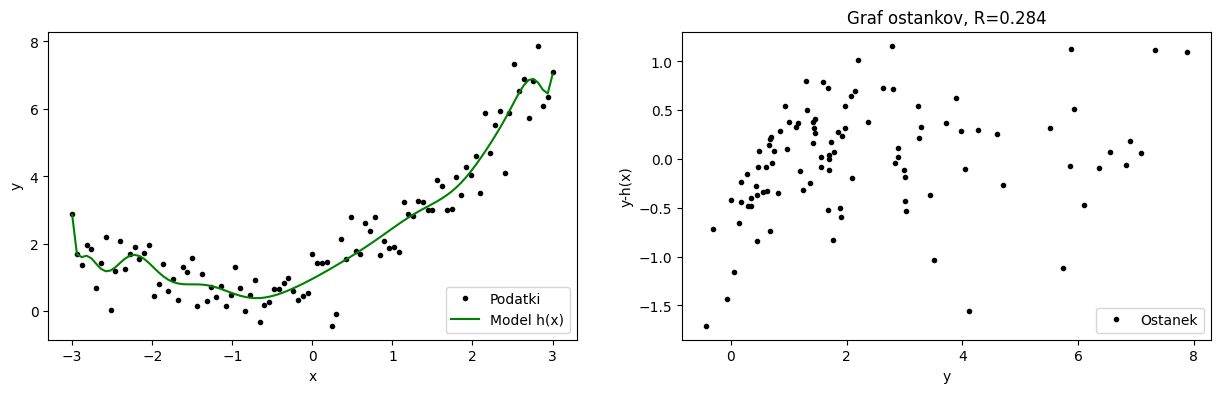

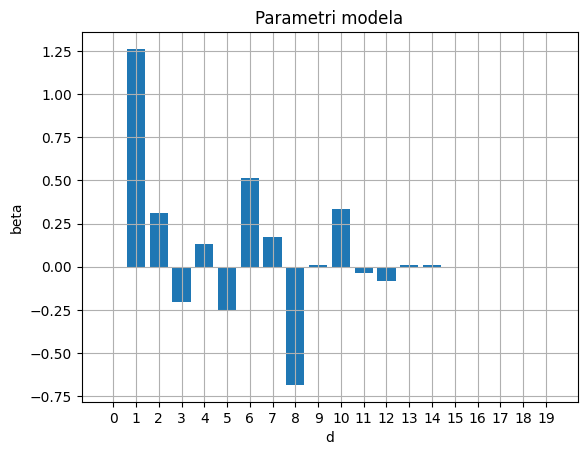

array([[ 0.00000000e+00,  1.26217864e+00,  3.08717559e-01,
        -2.02778184e-01,  1.33754685e-01, -2.57377898e-01,
         5.16873246e-01,  1.72097763e-01, -6.85213489e-01,
         1.11054649e-02,  3.34441318e-01, -3.57201034e-02,
        -8.24055057e-02,  1.19554991e-02,  1.09691702e-02,
        -1.79537577e-03, -7.53425903e-04,  1.29951564e-04,
         2.09637916e-05, -3.68433419e-06]])

In [15]:
model = Ridge(alpha=0.1)
model.fit(X, y)

hx = model.predict(X)

plot_fit_residual(X[:, 1], y, hx)
plot_coefficients(model.coef_)
model.coef_

##### Odgovor 6-1-4

##### Odgovor 6-1-5

##### Odgovor 6-1-6